In [29]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
ds = load_iris(as_frame=True)
X = ds.data.values
y = ds.target.values

In [13]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [14]:
X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((120, 4), (120,), (30, 4), (30,))

# Como NÃO fazer!

In [15]:
ss = StandardScaler()
ss.fit(X_treino)
X_treino = ss.transform(X_treino)
X_teste = ss.transform(X_teste)

In [16]:
acuracias = []
ks = list(range(1,30,2))

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_treino, y_treino)
    pred = knn.predict(X_teste)
    acuracias.append(accuracy_score(y_teste, pred))

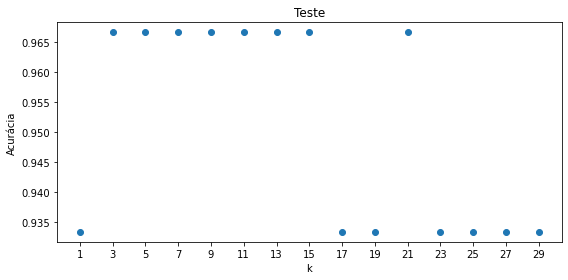

In [17]:
def plot_knn_k_acc(ks, acuracias, titulo=""):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(ks, acuracias)
    ax.set_xticks(ks)
    ax.set_xlabel("k")
    ax.set_ylabel("Acurácia")
    ax.set_title(titulo)
    fig.tight_layout()
    plt.show()

plot_knn_k_acc(ks, acuracias, "Teste")

In [18]:
melhor_k_teste = ks[np.argmax(acuracias)]
print("Melhor k no teste: %d (acc=%.2f)" % (melhor_k_teste, max(acuracias)))

Melhor k no teste: 3 (acc=0.97)


# Otimização de hiperparâmetros usando um conjunto de validação

In [19]:
X = ds.data.values
y = ds.target.values
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [20]:
X_treino, X_val, y_treino, y_val = train_test_split(
    X_treino, y_treino, test_size=0.2, stratify=y_treino, random_state=1
)

In [21]:
X_treino.shape, X_val.shape, X_teste.shape, y_treino.shape, y_val.shape, y_teste.shape

((96, 4), (24, 4), (30, 4), (96,), (24,), (30,))

In [22]:
ss = StandardScaler()
ss.fit(X_treino)
X_treino = ss.transform(X_treino)
X_teste = ss.transform(X_teste)
X_val = ss.transform(X_val)

Melhor k na validação: 7 (acc=0.96)


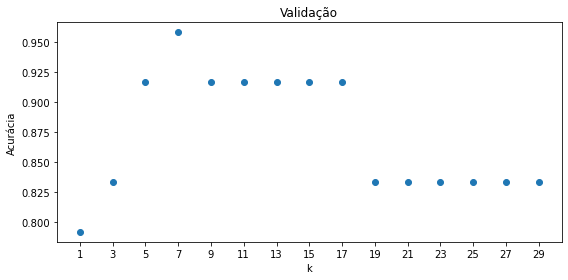

In [23]:
acuracias_val = []
ks = list(range(1,30,2))

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_treino, y_treino)
    pred = knn.predict(X_val)
    acuracias_val.append(accuracy_score(y_val, pred))

melhor_val = max(acuracias_val)
melhor_k = ks[np.argmax(acuracias_val)]
print("Melhor k na validação: %d (acc=%.2f)" % (melhor_k, melhor_val))
plot_knn_k_acc(ks, acuracias_val, "Validação")

In [24]:
knn = KNeighborsClassifier(n_neighbors=melhor_k)
knn.fit(X_treino, y_treino)
pred = knn.predict(X_teste)
print("Acurácia no teste: %.2f" % (accuracy_score(y_teste, pred)))

Acurácia no teste: 0.97


In [25]:
#usando treino + validação para treinar o modelo final
knn = KNeighborsClassifier(n_neighbors=melhor_k)
knn.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])
pred = knn.predict(X_teste)
print("Acurácia no teste: %.2f" % (accuracy_score(y_teste, pred)))

Acurácia no teste: 0.97


In [26]:
def selecionar_melhor_k(ks, X_treino, X_val, y_treino, y_val):
    acuracias_val = []
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_treino, y_treino)
        pred = knn.predict(X_val)
        acuracias_val.append(accuracy_score(y_val, pred))

    melhor_val = max(acuracias_val)
    melhor_k = ks[np.argmax(acuracias_val)]

    knn = KNeighborsClassifier(n_neighbors=melhor_k)
    knn.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])
    
    return knn, melhor_k, melhor_val

In [27]:
knn, melhor_k, melhor_val = selecionar_melhor_k(
    range(1,30,2),
    X_treino, X_val, y_treino, y_val
)

In [28]:
pred = knn.predict(X_teste)
acc = accuracy_score(y_teste, pred)
print("Melhor k na validação: %d (acc=%.2f)" % (melhor_k, melhor_val))
print("Acurácia no teste: %.2f" % acc)


Melhor k na validação: 7 (acc=0.96)
Acurácia no teste: 0.97
